In [21]:
#import 
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
import warnings

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Serigne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Serigne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Serigne\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
raw_data=pd.read_csv('winemag-data-130k-v2.csv')

In [23]:
#ignore all wannings
warnings.filterwarnings('ignore')

In [24]:
#lignes du fichier CSV car le fichier réel est trop volumineux
df=raw_data.head(15000)

In [25]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [26]:
df.isna().sum()

id                          0
country                     8
description                 0
designation              4334
points                      0
price                    1055
province                    8
region_1                 2533
region_2                 9170
taster_name              3071
taster_twitter_handle    3615
title                       0
variety                     0
winery                      0
dtype: int64

In [27]:
df.nunique()

id                       15000
country                     37
description              14889
designation               7658
points                      21
price                      192
province                   273
region_1                   822
region_2                    17
taster_name                 18
taster_twitter_handle       14
title                    14865
variety                    390
winery                    6992
dtype: int64

In [28]:
#Supprimer les colonnes, définir les NaNs de dépôt d’index et les doublons
df.drop(columns=["taster_name","taster_twitter_handle"],inplace=True)
df=df.set_index('id')
df.dropna(axis=0,inplace=True)
df.drop_duplicates(inplace=True)
df=df.reset_index(drop=True)

In [29]:
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve


In [30]:
#Vérifier la forme pour vérifier le nombre d’entrées disponibles
df.shape

(3907, 11)

In [31]:
#Obtenez des mots vides et ajoutez d’autres mots courants à partir d’un fichier texte dans l’ensemble
stopWords=set(stopwords.words('english'))
#Supprimer \n des caractères
with open('Common English Words.txt') as file:
    clearned_cwords=[word[:len(word)-1] for word in file.readlines()]
#Ajouter un fichier texte Mots courants pour arrêter les mots définis
for c_words in clearned_cwords:
    stopWords.add(c_words)

    
for wine_variety in df['variety']:
    stopWords.add(wine_variety)

In [32]:
lemmatizer = WordNetLemmatizer()

processed_sentences=[]
for desc in df['description']:
    preprocessed= [word.lower().strip() for word in desc.split() ]
    for index ,word in enumerate(preprocessed):
            match = re.search("[\d%,.]",word)
            if match is not None:
                 preprocessed.pop(index)
    preprocessed = [lemmatizer.lemmatize(word) for word in preprocessed]
    processed_sentences.append(" ".join(preprocessed))
       

    

        


In [33]:
for i in range (df.shape[0]):
    df.loc[i,"processed_description"]=processed_sentences[i]

In [34]:
scaler = StandardScaler()
standardize_col=['points','price']
for col in standardize_col:
    df[f"{col}_std"] = scaler.fit_transform(df[col].values.reshape(-1,1))

In [35]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,processed_description,points_std,price_std
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like the regular bottling from this come ...,-0.655429,0.935170
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,supple plum envelope an oaky structure in this...,-0.655429,-0.831781
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,this wine from the geneseo district offer arom...,-0.655429,-0.716545
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,oak and earth intermingle around robust aroma ...,-0.655429,1.088818
4,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,"rustic and this ha flavor of currants, licoric...",-0.984830,0.358990


In [36]:
df_mapped=df.copy()

In [37]:
for mapp_kw in ['winery','province','variety']:
    mapped={value:index for index,value in enumerate(list(df[mapp_kw]))
    df_mapped[mapp_kw].replace(list(mapped.keys()),list(mapped.values()))

SyntaxError: invalid syntax (551013222.py, line 3)

In [38]:
df= df.drop(['description'],axis=1)
df_mapped= df_mapped.drop(['description'],axis=1)

In [39]:
df_mapped.tail(5)

,country,designation,points,price,province,region_1,region_2,title,variety,winery,processed_description,points_std,price_std
3902,US,Estate,88,29.0,California,Sierra Foothills,Sierra Foothills,Naggiar 2009 Estate Petite Sirah (Sierra Footh...,Petite Sirah,Naggiar,made from estate-grown fruit sourced high in t...,-0.326028,-0.447661
3903,US,Radieux,88,31.0,Washington,Columbia Valley (WA),Columbia Valley,Ott & Murphy 2008 Radieux Red (Columbia Valley...,Bordeaux-style Red Blend,Ott & Murphy,a five-grape bordeaux-style this ha a scent of...,-0.326028,-0.370837
3904,US,Dry,88,16.0,New York,Finger Lakes,Finger Lakes,Silver Thread 2011 Dry Riesling (Finger Lakes),Riesling,Silver Thread,"rather savory aroma of fennel, apple and salin...",-0.326028,-0.947017
3905,US,The Illusionist,88,45.0,Washington,Columbia Valley (WA),Columbia Valley,Sleight of Hand 2009 The Illusionist Red (Colu...,Red Blend,Sleight of Hand,this is very spicy and with floral accent and ...,-0.326028,0.166930
3906,US,Anna's Vineyard Version,88,36.0,California,Paso Robles,Central Coast,Adelaida 2009 Anna's Vineyard Version Red (Pas...,Rhône-style Red Blend,Adelaida,there are ton of ripe flavor in this high-alco...,-0.326028,-0.178777


In [41]:
save_path= os.path.abspath('Charts')

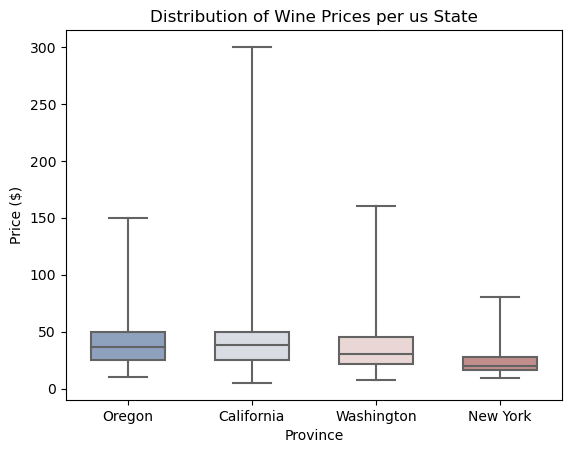

In [59]:
sns.boxplot(x='province',y='price',data=df,whis=[0,100],width=.6,palette="vlag").set(title='Distribution of Wine Prices per us State',xlabel='Province',

ylabel='Price ($)');
plt.savefig(save_path + '/WinePrices_perState_BXP.jpg')

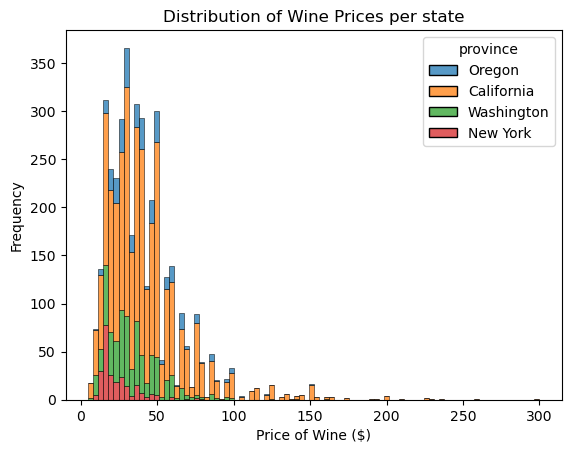

In [45]:
sns.histplot(df,x='price',hue='province',multiple='stack').set(title='Distribution of Wine Prices per state',xlabel='Price of Wine ($)',
                                                              ylabel='Frequency')
plt.savefig(save_path + '/PriceperProvince_Hist.jpg')

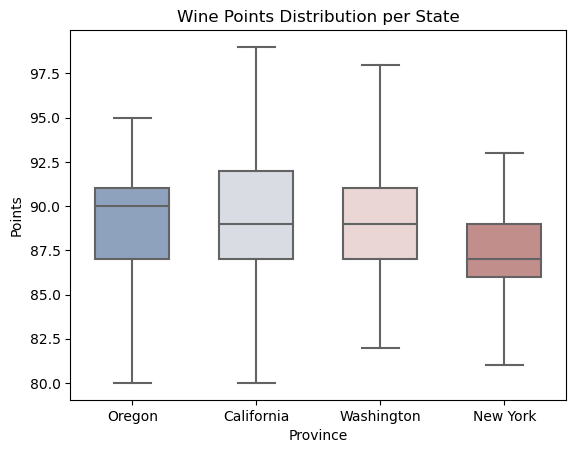

In [46]:
sns.boxplot(x='province',y='points',data=df,whis=[0,100],width=.6,palette="vlag").set(title='Wine Points Distribution per State',xlabel='Province',

ylabel='Points');
plt.savefig(save_path + '/PointsperProvince_BXP.jpg')

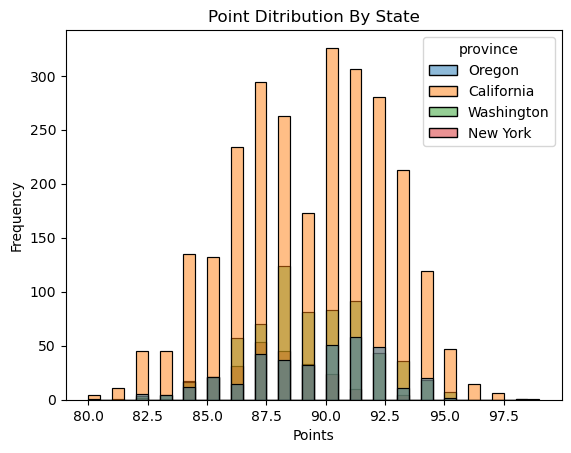

In [47]:
sns.histplot(df,x='points',hue='province').set(title='Point Ditribution By State',xlabel='Points',

ylabel='Frequency');
plt.savefig(save_path + '/PointsperProvince_HIST.jpg')

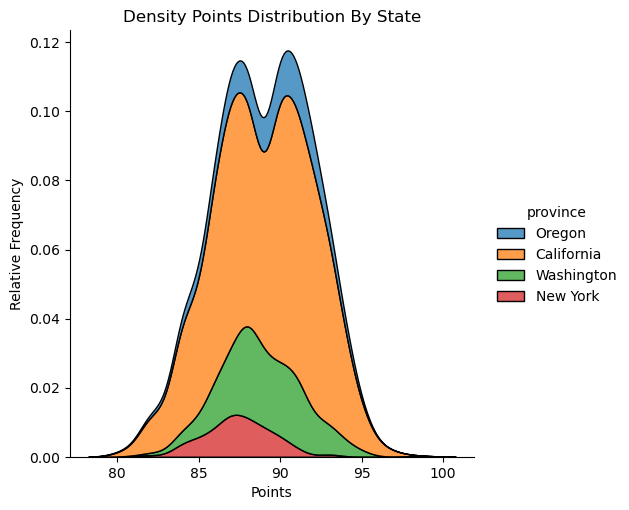

In [49]:
sns.displot(df,x='points',hue='province',kind="kde",multiple='stack').set(title='Density Points Distribution By State',xlabel='Points',

ylabel='Relative Frequency');
plt.savefig(save_path + '/PointsDensityperState_DIST.jpg')

In [50]:
def_dict = defaultdict(lambda:0)
for sentences in df['processed_description']:
    for word in sentences.split():
        def_dict[word]= def_dict[word]+1

In [56]:
word_counts=pd.DataFrame()
word_counts['Words']= def_dict.keys()
word_counts['Frequency']=def_dict.values()
word_counts=word_counts.sort_values('Frequency',ascending=False)
word_counts=word_counts[:10]
word_counts

,Words,Frequency
12,and,10896
2,the,6722
9,a,6057
20,of,5473
13,with,3553
6,this,3503
37,in,2673
105,is,2400
21,it,2198
28,to,1697


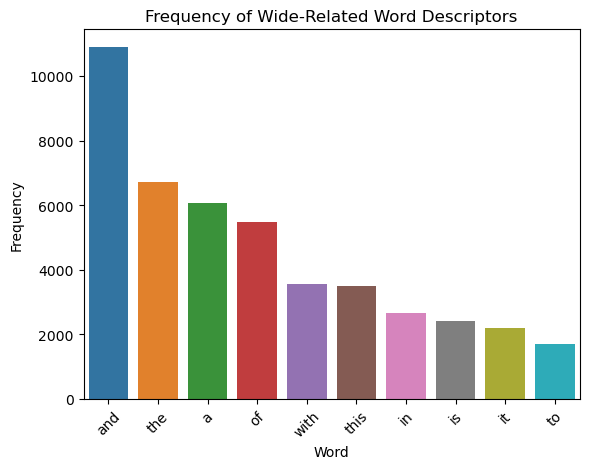

In [58]:
sns.barplot(data=word_counts,x='Words',y='Frequency')
plt.xticks(rotation=45)
plt.title('Frequency of Wide-Related Word Descriptors')
plt.xlabel('Word');

plt.savefig(save_path + '/DescriptionFrequency_BAR.jpg')


In [60]:
df_mapped.head(5)

,country,designation,points,price,province,region_1,region_2,title,variety,winery,processed_description,points_std,price_std
0,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like the regular bottling from this come ...,-0.655429,0.935170
1,US,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,supple plum envelope an oaky structure in this...,-0.655429,-0.831781
2,US,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,this wine from the geneseo district offer arom...,-0.655429,-0.716545
3,US,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,oak and earth intermingle around robust aroma ...,-0.655429,1.088818
4,US,Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,"rustic and this ha flavor of currants, licoric...",-0.984830,0.358990


In [63]:
x_feat_list=['points','price','winery','province','variety']
x_vals=df_mapped.loc[:,x_feat_list].values